In [1]:
# Importando a base de dados
import pandas as pd

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

dados = pd.read_csv(url)

dados.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


# TAREFA 1: Realizando a média da metragem para cada um dos Bairros.

In [2]:

# Passo 1: agrupar Dataframe por bairros
bairro_ord = dados.groupby("Bairro", as_index=False)

# Passo 2: Pegar a Metragem
bairro_metragem = bairro_ord["Metragem"]

# Passo 3: Fazer a media
bairro_metragem_media = bairro_metragem.mean()

bairro_metragem_media.tail(5)


,Bairro,Metragem
696,Vila Água Funda,152.200000
697,Água Branca,191.000000
698,Água Fria,165.416667
699,Água Funda,139.000000
700,Água Rasa,340.250000


# TAREFA 2: Duas formas de selecionar dados por Bairro.

In [3]:
bairro_exemplo = "Água Rasa"

#Primeira forma: usando máscara
masc = (dados["Bairro"] == bairro_exemplo)
bairros_masc = dados[masc].dropna()

#Segunda forma:  usando Querry
bairros_query = (dados.query("Bairro == @bairro_exemplo")).dropna()

bairros_masc == bairros_query

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1257,True,True,True,True,True,True,True,True
8960,True,True,True,True,True,True,True,True
9089,True,True,True,True,True,True,True,True
9145,True,True,True,True,True,True,True,True
9804,True,True,True,True,True,True,True,True


# TAREFA 3: Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, a fim de obter alguma conclusão.

<AxesSubplot:xlabel='Bairro'>

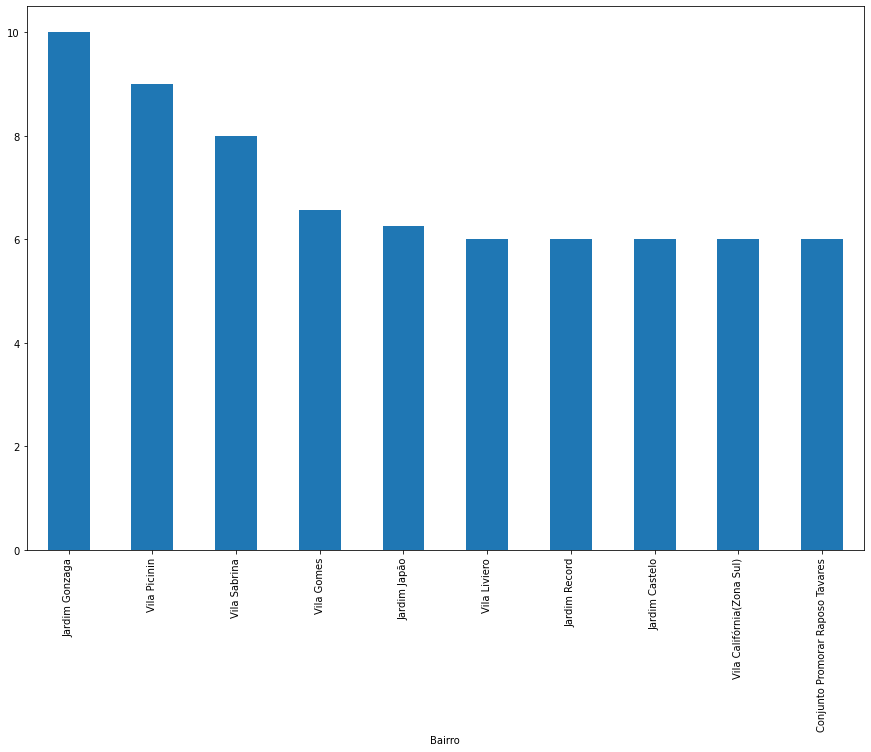

In [4]:
# Passo 1: escolher duas colunas, no caso Bairro e Quartos
col1 = "Bairro"
col2 = "Quartos"

# Passo 2: Agrupar por col1
col1_ord = dados.groupby(col1, as_index=True)

# Passo 3: selecionar col2
co1_col2 = col1_ord[col2]

# Passo 4: Obter o valor de uma func de col2
co1_col2_func = co1_col2.mean().sort_values(ascending=False)

co1_col2_func.head(10).plot.bar(x=col1, y=col2, figsize=(15,10))

## Conclusao:
# Foi possível identificar quais bairros possuem uma maior quantidade média de quartos

# TAREFA 4: Pegar outras estatisticas dos dados (como media, moda, mediana, min, max).

In [18]:
# Objetivo obter a media, moda, mediana, min e max dos valores de uma coluna.

col1 = "Quartos"

col1_mean   = dados[col1].mean()
col1_mode   = dados[col1].mode()[0]
col1_median = dados[col1].median()
col1_min    = dados[col1].min()
col1_max    = dados[col1].max()

pd.DataFrame([(col1_mean, col1_mode, col1_median, col1_min, col1_max)], 
            columns=('media','moda','mediana','minimo','maximo'))


,media,moda,mediana,minimo,maximo
0,3.483114,3,3.0,1,16


# TAREFA 5: Obter quais os Bairros que não possuem nome de rua.

In [52]:
# Passo 1: encontrando os NaNs
NaNs = (dados["Rua"].isna())

# Passo 2: aplicando a mascara
dados_sem_rua = dados[NaNs]

# Passo 3: pegando apenas os Bairros
bairros_sem_rua = dados_sem_rua["Bairro"]

# Passo 4: removendo duplicatas e ordenando
bairros_sem_rua_arr = dados_sem_rua["Bairro"].sort_index().drop_duplicates()

bairros_sem_rua_arr.head()

3                       Jardim Morumbi
11                    Jardim Luzitânia
31                      Parque da Lapa
56    Chácara Santo Antônio (Zona Sul)
57                      Jardim Guedala
Name: Bairro, dtype: object